# Data Cleaning Studio

You are part of a team working for an agricultural nonprofit based in California. Your nonprofit focuses on helping farmers in the state grow profitable crops in environmentally-friendly ways in an effort to reduce the impact of climate change on the state and provide enough food for the state's 39.5 million residents. With Halloween on the horizon, you and your team are looking to analyze past pumpkin crops to try and answer several questions:
1. Are pumpkins sold at terminal markets in California (San Francisco and Los Angeles) grown in California?
1. Is the harvest season for pumpkins grown in California consistent year-to-year?
1. Are pumpkin farmers growing specific varieties of pumpkins for specific reasons?

The answers to these questions will help your nonprofit decide if they should promote specific varieties or growing practices to the farmers they serve in time for seeds to be planted next year. Your team has already performed some exploratory analysis on the San Francisco terminal market report of pumpkin sales from 9/2016-9/2017. Now it is time to clean the data!

Before diving in to cleaning the data, here is a quick guide to the different columns in the USDA report and what they mean:
- Commodity Name: This CSV structure is used for lots of USDA reports. In this case, the commodity is pumpkins
- City Name: City where the pumpkin was sold. The city is a terminal market location within the United States.
- Type: This refers to the type of farming used in growing the pumpkins
- Package: The way the pumpkins were packed for sale
- Variety: Specific type of pumpkin, i.e. pie pumpkin or a Howden pumpkin
- Sub Variety: Addition classifications about the pumpkins, i.e. is it a flat pumpkin?
- Grade: In the US, usually only canned pumpkin is graded
- Date: Date of sale (rounded up to the nearest Saturday)
- Low Price: This price is in reference to sale price
- High Price: This price is in reference to sale price
- Mostly Low: This column is not measured for pumpkins
- Mostly High: This column is not measured for pumpkins
- Origin: Which state the pumpkins were grown in
- Origin District: Additional information about pumpkins' origin location
- Item Size: Abbreviations denoting size, i.e. jbo = jumbo, lrg = large
- Color: Color of pumpkins
- Environment: Additional information about pumpkins' growing environment
- Unit of Sale: The unit the customer bought at market, i.e. if they bought pumpkins by the pound, the data should say "PER LB" or  if they bought pumpkins by the bin, it would say "PER BIN"
- Quality: Additional notes about pumpkin quality as necessary
- Condition: Additional notes about pumpkin condition as necessary
- Appearance: Additional notes about pumpkin appearance as necessary
- Storage: Additional notes about pumpkin storage as necessary
- Crop: Additional notes about pumpkin crop as necessary
- Repack: Whether the pumpkin has been repackaged before sale
- Trans Mode: Mode of transportation used to get pumpkins to terminal market

In [321]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("san-fransisco_9-24-2016_9-30-2017.csv")

In [322]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,135.0,135.0,135.0,135.0,CALIFORNIA,NaN,sml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,135.0,150.0,135.0,150.0,CALIFORNIA,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [323]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 78%
Package - 0%
Variety - 0%
Sub Variety - 61%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 100%
Item Size - 75%
Color - 72%
Environment - 100%
Unit of Sale - 100%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [324]:
# Checking the overall percentage of missing data from the data set

total_cells = np.product(data.shape)

missing_cells = pd.isnull(data).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")    

51.0 % Missing cells from the data


### Question 1: 

Look at the percentages of missing data per coluum.  There are quite a few columns with less than 100% of the data.  What do you want to do with each column?   Consider the following options for each and write down your thoughts in a box below this one.
1. Drop the Observation
1. Drop the Feature
1. Impute the Missing Values
1. Replace the Missing Values

In [325]:
# Answer Question 1 here:
#In my observation i noticed that we can drop some of the columns in this data.
#City Name: This analysis is focused on terminal markets in San Fransisco and Los Angeles,
# knowing the specific city where the pumpkin was sold is not necessary.
# Type: in this column it's type of farming for pumpkins its not relevant to analysis.
# Sub Variety: This column is mostly null, it can be dropped.
# Grade: This column is null, it can be dropped.
# Mostly Low: duplicate data of Low Price.
# Mostly High: duplicate data of High Price.
# Orgin District: null
# Item Size: Mostly null.
# color : Mostly null.
# Environment, Unit of Sale, Quality, Condition, Appearance, Storage, Crop & Trans Mode : Null.






In [326]:
df = pd.read_csv("san-fransisco_9-24-2016_9-30-2017.csv")
#Print out any information needed for the dataframe to understand
df.info(verbose=True)
df.info()
pd.options.display.max_columns = 100
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity Name   166 non-null    object 
 1   City Name        166 non-null    object 
 2   Type             36 non-null     object 
 3   Package          166 non-null    object 
 4   Variety          166 non-null    object 
 5   Sub Variety      64 non-null     object 
 6   Grade            0 non-null      float64
 7   Date             166 non-null    object 
 8   Low Price        166 non-null    float64
 9   High Price       166 non-null    float64
 10  Mostly Low       166 non-null    float64
 11  Mostly High      166 non-null    float64
 12  Origin           166 non-null    object 
 13  Origin District  0 non-null      float64
 14  Item Size        41 non-null     object 
 15  Color            46 non-null     object 
 16  Environment      0 non-null      float64
 17  Unit of Sale    

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,135.0,135.0,135.0,135.0,CALIFORNIA,NaN,sml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,135.0,150.0,135.0,150.0,CALIFORNIA,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [327]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)

(166, 25)
Commodity Name      object
City Name           object
Type                object
Package             object
Variety             object
Sub Variety         object
Grade              float64
Date                object
Low Price          float64
High Price         float64
Mostly Low         float64
Mostly High        float64
Origin              object
Origin District    float64
Item Size           object
Color               object
Environment        float64
Unit of Sale       float64
Quality            float64
Condition          float64
Appearance         float64
Storage            float64
Crop               float64
Repack              object
Trans Mode         float64
dtype: object


In [328]:
# select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Grade', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin District', 'Environment', 'Unit of Sale', 'Quality',
       'Condition', 'Appearance', 'Storage', 'Crop', 'Trans Mode'],
      dtype='object')
Index(['Commodity Name', 'City Name', 'Type', 'Package', 'Variety',
       'Sub Variety', 'Date', 'Origin', 'Item Size', 'Color', 'Repack'],
      dtype='object')


In [329]:
df[non_numeric_cols].info

<bound method DataFrame.info of     Commodity Name      City Name Type        Package      Variety  \
0         PUMPKINS  SAN FRANCISCO  NaN   24 inch bins  HOWDEN TYPE   
1         PUMPKINS  SAN FRANCISCO  NaN   24 inch bins  HOWDEN TYPE   
2         PUMPKINS  SAN FRANCISCO  NaN   24 inch bins  HOWDEN TYPE   
3         PUMPKINS  SAN FRANCISCO  NaN   24 inch bins  HOWDEN TYPE   
4         PUMPKINS  SAN FRANCISCO  NaN   24 inch bins  HOWDEN TYPE   
..             ...            ...  ...            ...          ...   
161       PUMPKINS  SAN FRANCISCO  NaN  40 lb cartons    MINIATURE   
162       PUMPKINS  SAN FRANCISCO  NaN  40 lb cartons    MINIATURE   
163       PUMPKINS  SAN FRANCISCO  NaN  40 lb cartons    MINIATURE   
164       PUMPKINS  SAN FRANCISCO  NaN  40 lb cartons    MINIATURE   
165       PUMPKINS  SAN FRANCISCO  NaN  40 lb cartons    MINIATURE   

    Sub Variety        Date      Origin Item Size Color Repack  
0           NaN  09/24/2016  CALIFORNIA       NaN   NaN      N

In [330]:
num_missing = df.isna().sum()
num_missing[:10]

Commodity Name      0
City Name           0
Type              130
Package             0
Variety             0
Sub Variety       102
Grade             166
Date                0
Low Price           0
High Price          0
dtype: int64

In [331]:
pct_missing = df.isna().mean()
pct_missing[:10]

Commodity Name    0.000000
City Name         0.000000
Type              0.783133
Package           0.000000
Variety           0.000000
Sub Variety       0.614458
Grade             1.000000
Date              0.000000
Low Price         0.000000
High Price        0.000000
dtype: float64

<AxesSubplot:>

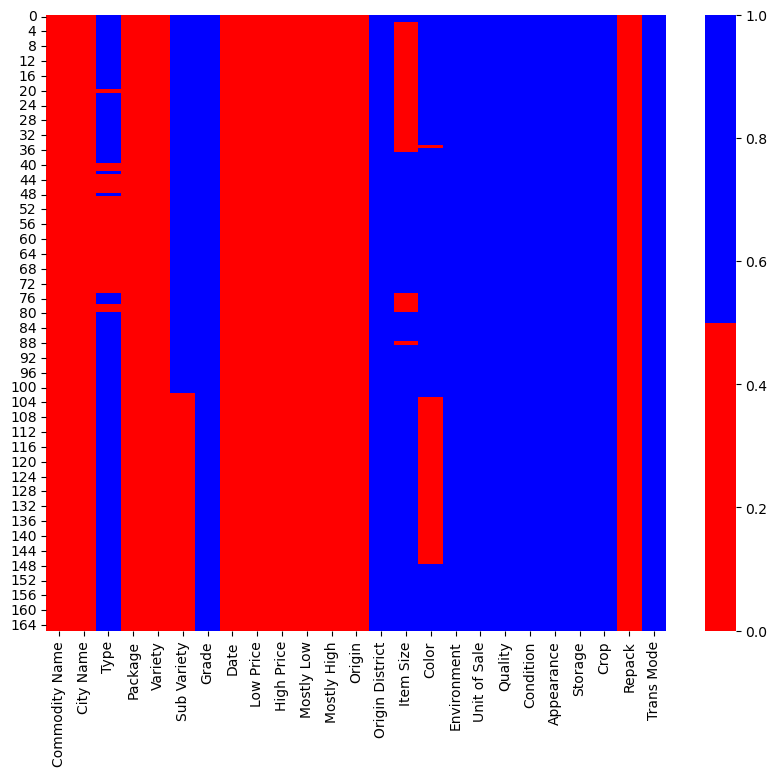

In [332]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))
cols = df.columns
colours = ['red', 'blue'] # specify colours: blue - missing. red - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [333]:
# Try out a missing data percentage list! 
#% of missing

missing_data_percents = df.isna().mean() * 100
missing_data_percents

Commodity Name       0.000000
City Name            0.000000
Type                78.313253
Package              0.000000
Variety              0.000000
Sub Variety         61.445783
Grade              100.000000
Date                 0.000000
Low Price            0.000000
High Price           0.000000
Mostly Low           0.000000
Mostly High          0.000000
Origin               0.000000
Origin District    100.000000
Item Size           75.301205
Color               72.289157
Environment        100.000000
Unit of Sale       100.000000
Quality            100.000000
Condition          100.000000
Appearance         100.000000
Storage            100.000000
Crop               100.000000
Repack               0.000000
Trans Mode         100.000000
dtype: float64

<AxesSubplot:>

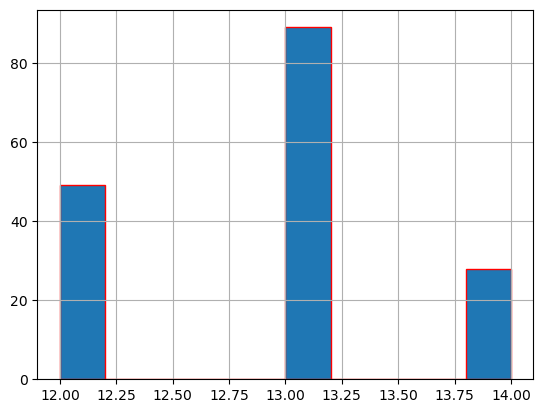

In [334]:
# Plot a missing data histogram
missing_by_rows = df.isna().sum(axis='columns')
missing_by_rows.hist(bins=10, edgecolor='red', linewidth=1)

In [335]:
# Handle any missing data in your dataframe.
#drop all the columns that have above 90% null values
df_above_90_percent_null = df[df.columns[df.isna().mean() * 100 >= 90]]
print(df_above_90_percent_null.columns)
print(df.shape)
df = df.drop(axis='columns', columns=df_above_90_percent_null)
df.shape
df.index

Index(['Grade', 'Origin District', 'Environment', 'Unit of Sale', 'Quality',
       'Condition', 'Appearance', 'Storage', 'Crop', 'Trans Mode'],
      dtype='object')
(166, 25)


RangeIndex(start=0, stop=166, step=1)

In [336]:
#investigate 0% null of column
df_zero_percent_null = df[df.columns[(df.isna().mean() * 100) == 0]]
print(df_zero_percent_null.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity Name  166 non-null    object 
 1   City Name       166 non-null    object 
 2   Package         166 non-null    object 
 3   Variety         166 non-null    object 
 4   Date            166 non-null    object 
 5   Low Price       166 non-null    float64
 6   High Price      166 non-null    float64
 7   Mostly Low      166 non-null    float64
 8   Mostly High     166 non-null    float64
 9   Origin          166 non-null    object 
 10  Repack          166 non-null    object 
dtypes: float64(4), object(7)
memory usage: 14.4+ KB
None


In [337]:
uni_columns = []
for col in df_zero_percent_null:
    print(f"{col}: {len(df_zero_percent_null[col].unique())}")
    if len(df_zero_percent_null[col].unique()) ==1:
        uni_columns.append(col)
print(uni_columns)
print(df.shape)
df = df.drop(axis='columns', columns=uni_columns)
print(df.shape)

Commodity Name: 1
City Name: 1
Package: 9
Variety: 8
Date: 19
Low Price: 37
High Price: 37
Mostly Low: 37
Mostly High: 37
Origin: 2
Repack: 1
['Commodity Name', 'City Name', 'Repack']
(166, 15)
(166, 12)


In [338]:
df.head()

,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color
0,NaN,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
1,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
2,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,lge,NaN
3,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,135.0,135.0,135.0,135.0,CALIFORNIA,sml,NaN
4,NaN,24 inch bins,HOWDEN TYPE,NaN,10/08/2016,135.0,150.0,135.0,150.0,CALIFORNIA,lge,NaN


In [339]:
# Repack Column
data["Repack"] = data["Repack"].replace({"N":False})
#Check status with a quick head check
data.head(3)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


# Question 2:

Look at the "Type" column.  This column contains two values, "Organic" and "NaN".  
When it comes to food, food is either typically designated as "Organic" or "Conventional" based on farming practices.  

Do you think we should update the "NaN" values to "Conventional"?  Why or Why not?

In [340]:
# Answers Question 2:
#When it comes to food we always prefer it to be organic but here in this analysis
#it's focusing on selling in the market, but i may keep this column and filling the 
#missing values with Conventional because I'm not sure about it.

df_less_missing_rows = df[missing_by_rows < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=166-35+1).shape



(166, 12)

In [341]:
# Fill the Missing Values in the Type Column
data["Type"] = data["Type"].fillna("Conventional")
print(data["Type"])

0      Conventional
1      Conventional
2      Conventional
3      Conventional
4      Conventional
           ...     
161    Conventional
162    Conventional
163    Conventional
164    Conventional
165    Conventional
Name: Type, Length: 166, dtype: object


# Question 3

Based on the information provided by our team, "Grade" is only applied to canned pumpkin.  
These were all uncanned, whole pumpkins.  This column is irrelevant to the dataset.

We are going to drop the column.  Do you agree with this choice?  Why or why not?

In [342]:
# Answer Question 3 here:
#Yes, thsi column is all null values and we are not selling the canned pumpkins in the market.

In [343]:
# Grade Column 
data = data.drop(["Grade"], axis=1)
print(data)

    Commodity Name      City Name          Type        Package      Variety  \
0         PUMPKINS  SAN FRANCISCO  Conventional   24 inch bins  HOWDEN TYPE   
1         PUMPKINS  SAN FRANCISCO  Conventional   24 inch bins  HOWDEN TYPE   
2         PUMPKINS  SAN FRANCISCO  Conventional   24 inch bins  HOWDEN TYPE   
3         PUMPKINS  SAN FRANCISCO  Conventional   24 inch bins  HOWDEN TYPE   
4         PUMPKINS  SAN FRANCISCO  Conventional   24 inch bins  HOWDEN TYPE   
..             ...            ...           ...            ...          ...   
161       PUMPKINS  SAN FRANCISCO  Conventional  40 lb cartons    MINIATURE   
162       PUMPKINS  SAN FRANCISCO  Conventional  40 lb cartons    MINIATURE   
163       PUMPKINS  SAN FRANCISCO  Conventional  40 lb cartons    MINIATURE   
164       PUMPKINS  SAN FRANCISCO  Conventional  40 lb cartons    MINIATURE   
165       PUMPKINS  SAN FRANCISCO  Conventional  40 lb cartons    MINIATURE   

    Sub Variety        Date  Low Price  High Price 

In [344]:
df.head()

,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color
0,NaN,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
1,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
2,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,lge,NaN
3,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,135.0,135.0,135.0,135.0,CALIFORNIA,sml,NaN
4,NaN,24 inch bins,HOWDEN TYPE,NaN,10/08/2016,135.0,150.0,135.0,150.0,CALIFORNIA,lge,NaN


In [345]:
#Check with shape
data.shape

(166, 24)

<AxesSubplot:>

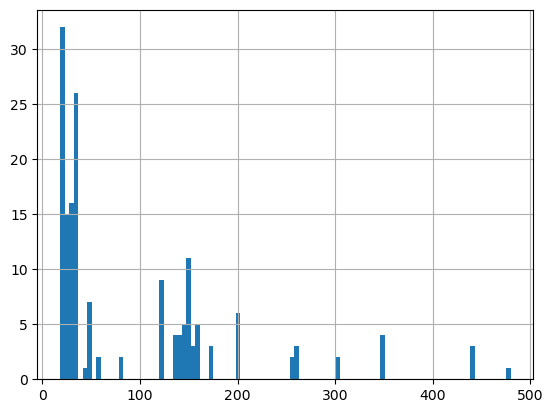

In [346]:
#Finding Outliers
#Plot a Histogram
df['Low Price'].describe()
df['High Price'].hist(bins=100)

array([[<AxesSubplot:title={'center':'Low Price'}>,
        <AxesSubplot:title={'center':'High Price'}>],
       [<AxesSubplot:title={'center':'Mostly Low'}>,
        <AxesSubplot:title={'center':'Mostly High'}>]], dtype=object)

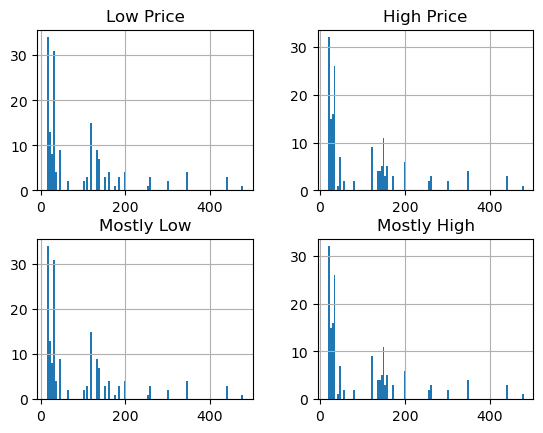

In [347]:
df.hist(bins=100)

In [348]:
#Use the describe () method
df['Low Price'].describe()

count    166.000000
mean      89.301205
std       97.067497
min       16.000000
25%       24.000000
50%       32.375000
75%      135.000000
max      480.000000
Name: Low Price, dtype: float64

In [349]:
#Use the describe () method
df['High Price'].describe()

count    166.000000
mean      94.551205
std       98.499417
min       18.000000
25%       25.250000
50%       35.000000
75%      150.000000
max      480.000000
Name: High Price, dtype: float64

# Question 4

Decide which columns are relevant and irrelevant as a group.

Do you think any of the columns empty for a reason?  What reason do you think? 
Is this intentional or unintentional?  
What do you think?

In [350]:
# Explain your rationale breifly here: 
#I consider these are the relevant datas - [Type, Package, Variety, Date, Low Price, High Price, Origin, Item Size & Color]
#I consider these are Irrelevant datas - [Commodity Name, City Name, Sub Variety, Grade, Mostly Low, Mostly High,
#Origin District, Environment, Unit of Sale, Quality, Condition, Appearance, Storage, Crop & Trans Mode]

In [351]:
# Drop the ones you decide are irrelevant using the code we used to drop the "Grade Column"
data = data.drop(["Commodity Name", "City Name", "Sub Variety", "Mostly Low", "Mostly High",
"Origin District", "Environment", "Unit of Sale", "Condition", "Appearance", "Storage",
"Crop", "Trans Mode"], axis=1)
print(data.columns)
df.head()

Index(['Type', 'Package', 'Variety', 'Date', 'Low Price', 'High Price',
       'Origin', 'Item Size', 'Color', 'Quality', 'Repack'],
      dtype='object')


,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color
0,NaN,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
1,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,NaN,NaN
2,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,155.0,CALIFORNIA,lge,NaN
3,NaN,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,135.0,135.0,135.0,135.0,CALIFORNIA,sml,NaN
4,NaN,24 inch bins,HOWDEN TYPE,NaN,10/08/2016,135.0,150.0,135.0,150.0,CALIFORNIA,lge,NaN


In [352]:
# Look for any relevant data in the dataframe. How will you handle it?
df = df[['Type', 'Package', 'Variety', 'Date', 'Low Price', 'High Price', 'Origin', 'Item Size', 'Color']]
df.head()

,Type,Package,Variety,Date,Low Price,High Price,Origin,Item Size,Color
0,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,155.0,155.0,CALIFORNIA,NaN,NaN
1,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,155.0,155.0,CALIFORNIA,NaN,NaN
2,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,155.0,155.0,CALIFORNIA,lge,NaN
3,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,135.0,135.0,CALIFORNIA,sml,NaN
4,NaN,24 inch bins,HOWDEN TYPE,10/08/2016,135.0,150.0,CALIFORNIA,lge,NaN


In [353]:
# Type, Item Size & color Column
data["Type"] = data["Type"].replace({"N":False})
data["Item Size"] = data["Item Size"].replace({"N":False})
data["Color"] = data["Color"].replace({"N":False})
#Check status with a quick head check
data.head()

,Type,Package,Variety,Date,Low Price,High Price,Origin,Item Size,Color,Quality,Repack
0,Conventional,24 inch bins,HOWDEN TYPE,09/24/2016,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,False
1,Conventional,24 inch bins,HOWDEN TYPE,10/01/2016,155.0,155.0,CALIFORNIA,NaN,NaN,NaN,False
2,Conventional,24 inch bins,HOWDEN TYPE,10/01/2016,155.0,155.0,CALIFORNIA,lge,NaN,NaN,False
3,Conventional,24 inch bins,HOWDEN TYPE,10/01/2016,135.0,135.0,CALIFORNIA,sml,NaN,NaN,False
4,Conventional,24 inch bins,HOWDEN TYPE,10/08/2016,135.0,150.0,CALIFORNIA,lge,NaN,NaN,False


# Question 5:

Plot the outliers for them.
histogram of date vs. sales


What do you think about the dates?  

In [354]:
# Answer 5 here:
# It looks like its a seasonal sales started on September and it was good, gradually
# grows in October and in mid of October it shows a high sales  and then later November,
#December and January the sales gradually goes down.


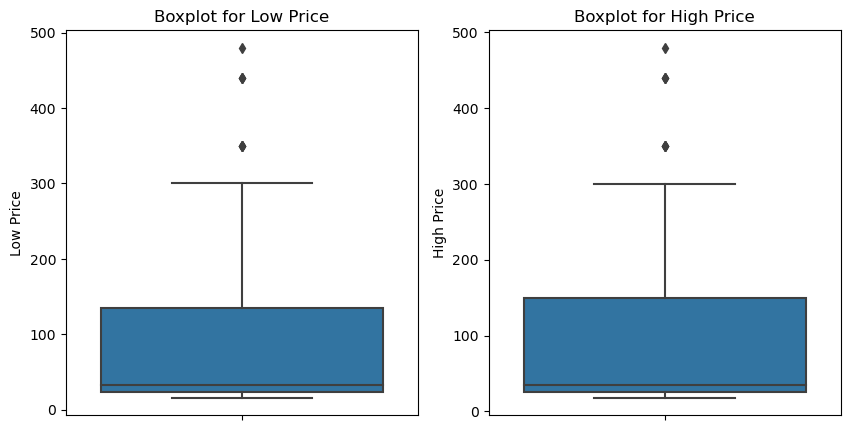

In [355]:
# create a figure with two subplots
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# plot boxplots for 'Low Price' and 'High Price' columns
sns.boxplot(y='Low Price', data=data, ax=ax[0])
sns.boxplot(y='High Price', data=data, ax=ax[1])

# set titles for the subplots
ax[0].set_title('Boxplot for Low Price')
ax[1].set_title('Boxplot for High Price')

# display the plot
plt.show()


<AxesSubplot:>

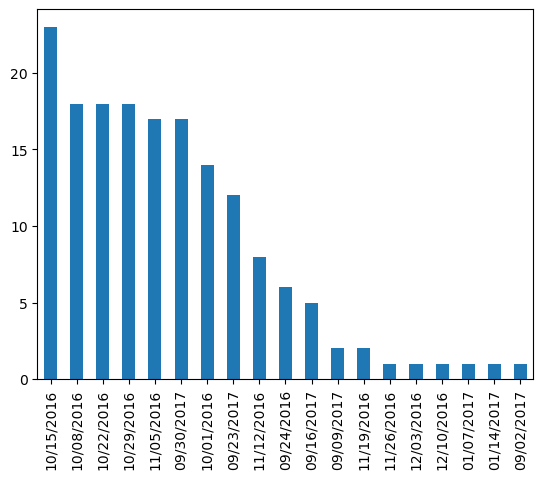

In [356]:
# # bar chart -  distribution of a categorical variable
data['Date'].value_counts().plot.bar()

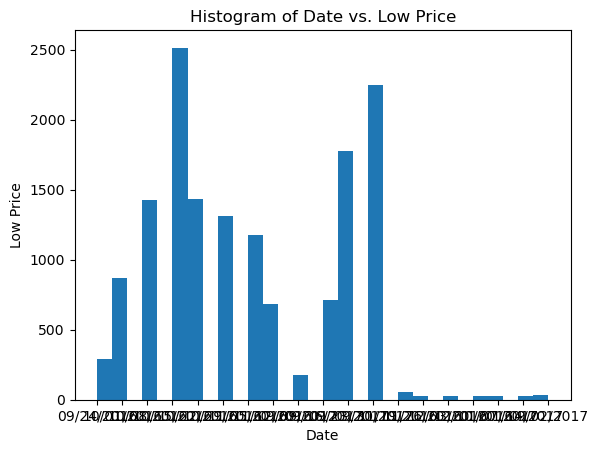

,Low Price,High Price
count,166.000000,166.000000
mean,89.301205,94.551205
std,97.067497,98.499417
min,16.000000,18.000000
25%,24.000000,25.250000
50%,32.375000,35.000000
75%,135.000000,150.000000
max,480.000000,480.000000


In [357]:
# create a histogram of date vs. sales
plt.hist(data['Date'], weights=data['Low Price'], bins=30)

# set the plot title and labels
plt.title('Histogram of Date vs. Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')

# display the plot
plt.show()
df.describe()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

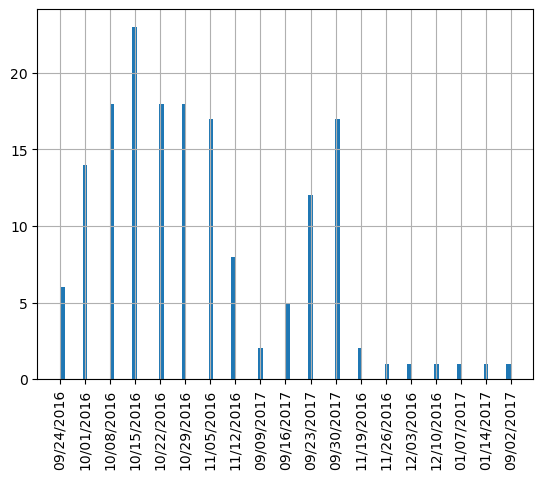

In [358]:
# # histogram of dates.
data['Date'].hist(bins=100)
plt.xticks(rotation=90)

#ignore the lists above the histogram for right now.  Examine the histogram.

# Question 6:

Are there any points in this data set that you worry about inconsistencies? 
Where?  What would you want to check?  Why?

In [359]:
# Answer Question 6 here: 

# I would be checking for these columns is there any inconsistencies.
# Origin - In this data they include two places, we need to check whether pumpkins are grown in each district
# are consistent and accurately recorded.
# Type - This data includes information on the type of farming used in growing the pumpkins.
# It would be important to check whether this information is recorded accurately.
# Variety - IT shows specific varieties of pumpkins, it would be useful to check the consistent of this data in this column.
# Package - It shows on which dates the pumpkins were packed for sales, it would be useful to check the consistent
# of this data and its recorded accurately.

# Bonus Mission

Fix the LA page at this link: [A Year of Pumpkin Prices](https://www.kaggle.com/usda/a-year-of-pumpkin-prices)